## Google Drive setting

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
%cd /content/drive/MyDrive/AIncome

/content/drive/MyDrive/AIncome


In [126]:
!pwd

/content/drive/MyDrive/AIncome


### 作業フォルダ

In [127]:
!mkdir AutoTrade09

mkdir: cannot create directory ‘AutoTrade09’: File exists


In [128]:
%cd  AutoTrade09

/content/drive/MyDrive/AIncome/AutoTrade09


In [129]:
!pwd

/content/drive/MyDrive/AIncome/AutoTrade09


## 必要パッケージのインストール

In [130]:
"""
#!pip install gym[all] -U
!pip install "gym==0.19.0"
!pip install stable-baselines[mpi]
#!pip install tensorflow==1.14.0
!pip install tensorflow-gpu==1.14.0
!pip install pyqt5
!pip install imageio
!pip install gym-anytrading
"""
!pip install "gym==0.19.0"
!pip install stable-baselines[mpi]
!pip uninstall -y tensorflow-gpu
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0
!pip install gym-anytrading

!pip install QuantStats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: tensorflow-gpu 1.14.0
Uninstalling tensorflow-gpu-1.14.0:
  Successfully uninstalled tensorflow-gpu-1.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow_gpu-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (377.1 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
!pip uninstall tensorboard-plugin-wit --yes

## インポート


In [208]:
"""

import gym_anytrading

from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import ACKTR
from stable_baselines.bench import Monitor
from stable_baselines.common import set_global_seeds
"""
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import gym

import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

from stable_baselines.bench import Monitor

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
#from stable_baselines import PPO2
from stable_baselines import ACKTR
from stable_baselines import A2C

import quantstats as qs

## 設定

In [209]:

# ログフォルダの生成
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)


# train data
idx1 = 100
idx2 = 5000

# test data
idx3 = 6000

window_size = 100

trade_fee = 0


## 環境の生成

In [237]:

def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyForexEnv(ForexEnv):
    _process_data = my_process_data

"""
# df = gym_anytrading.datasets.STOCKS_GOOGL.copy()
df = FOREX_EURUSD_1H_ASK.copy()
print(df.head())
window_size = 10
start_index = window_size
end_index = len(df)


def env_maker():
  return gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
  )
"""

env_marker2 = lambda:  MyForexEnv(df=df, window_size=window_size, frame_bound=(idx1, idx2))
env_marker2.trade_fee = trade_fee
# env = DummyVecEnv([env_maker for _ in range(10)])
# env = DummyVecEnv([env_maker for _ in range(1)])
env = DummyVecEnv([env_marker2 for _ in range(1)])

#env = Monitor(env, log_dir, allow_early_resets=True)

## Train

In [258]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = PPO2('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs, nminibatches=1, tensorboard_log=log_dir)
model.learn(total_timesteps=100000)

Wrapping the env in a DummyVecEnv.


n_updates : 781
total_timesteps : 100000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:509: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


ストリーミング出力は最後の 5000 行に切り捨てられました。
| serial_timesteps   | 57344           |
| time_elapsed       | 300             |
| total_timesteps    | 57344           |
| value_loss         | 719.87354       |
----------------------------------------
0
----------------------------------------
| approxkl           | 5.552556e-06    |
| clipfrac           | 0.0             |
| episode_reward     | [-632.99996714] |
| explained_variance | 2.81e-05        |
| fps                | 231             |
| n_updates          | 449             |
| policy_entropy     | 0.69281244      |
| policy_loss        | -0.00014998415  |
| serial_timesteps   | 57472           |
| time_elapsed       | 301             |
| total_timesteps    | 57472           |
| value_loss         | 401.4166        |
----------------------------------------
0
----------------------------------------
| approxkl           | 0.00045888976   |
| clipfrac           | 0.0             |
| episode_reward     | [-643.29997808] |
| explained_variance 

## Save model


In [259]:
model.save("ppo2_forex-v0_lstm")

## Load model

In [260]:
model = PPO2.load("ppo2_forex-v0_lstm")

Loading a model without an environment, this model cannot be trained until it has a valid environment.


In [261]:

"""
# multiprocess environment
# env = make_vec_env('forex-v0', n_envs=400)
env.trade_fee = trade_fee

model = PPO2(MlpPolicy, env, tensorboard_log=log_dir)
# model = PPO2('MlpPolicy', env, tensorboard_log=log_dir)
# model = ACKTR('MlpPolicy', env, tensorboard_log=log_dir)
# model = A2C('MlpPolicy', env, tensorboard_log=log_dir)

model.learn(total_timesteps=2500000)
model.save("ppo2_forex-v0")

# del model # remove to demonstrate saving and loading

model = PPO2.load("ppo2_forex-v0")
"""


'\n# multiprocess environment\n# env = make_vec_env(\'forex-v0\', n_envs=400)\nenv.trade_fee = trade_fee\n\nmodel = PPO2(MlpPolicy, env, tensorboard_log=log_dir)\n# model = PPO2(\'MlpPolicy\', env, tensorboard_log=log_dir)\n# model = ACKTR(\'MlpPolicy\', env, tensorboard_log=log_dir)\n# model = A2C(\'MlpPolicy\', env, tensorboard_log=log_dir)\n\nmodel.learn(total_timesteps=2500000)\nmodel.save("ppo2_forex-v0")\n\n# del model # remove to demonstrate saving and loading\n\nmodel = PPO2.load("ppo2_forex-v0")\n'

## Test

In [262]:
import numpy as np

# env = DummyVecEnv([env_maker for _ in range(10)])
# env = env_maker()
env = env_marker2()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]
    #observation = np.tile(observation, (10, 1, 1))

    # ----------------------------
    # observation
    #
    # print(observation)
    # print(observation.shape)

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    # print(action.shape)
    observation, reward, done, info = env.step(action)

    print(done)
    # env.render()
    if done:
        print("info:", info)
        break

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

## Analysis Using quantstats

In [263]:
print(env)
print(len(env.history['total_profit']))
print(len(df.index))
print(len(df.index[idx1:idx2]))

<MyForexEnv instance>
4899
6225
4900


[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2017-06-01
End Period                 2017-10-19
Risk-Free Rate             0.0%
Time in Market             13.0%

Cumulative Return          -22.98%
CAGR﹪                     -49.38%

Sharpe                     -0.94
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -0.94
Sortino                    -1.14
Smart Sortino              -1.14
Sortino/√2                 -0.81
Smart Sortino/√2           -0.8
Omega                      0.59

Max Drawdown               -23.2%
Longest DD Days            60
Volatility (ann.)          1.41%
Calmar                     -2.13
Skew                       -3.78
Kurtosis                   72.91

Expected Daily %           -0.01%
Expected Monthly %         -2.15%
Expected Yearly %          -22.98%
Kelly Criterion            -27.89%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.15%
Expected Shortfall (cVaR)  -

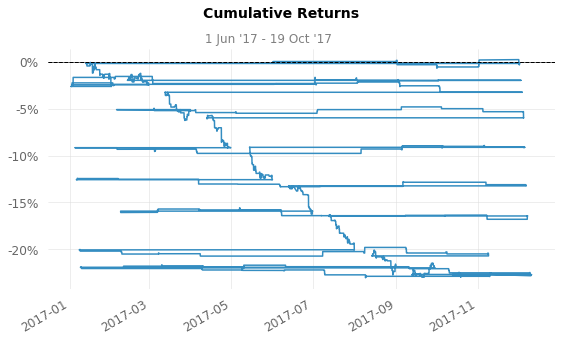

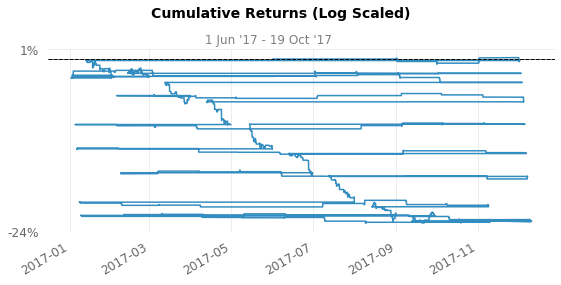

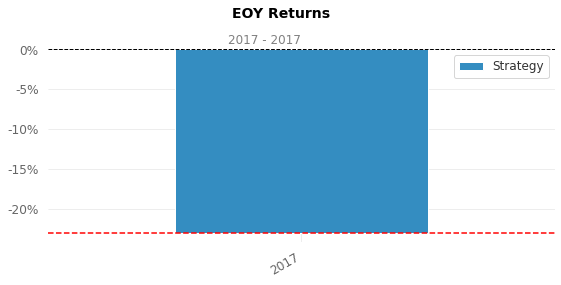

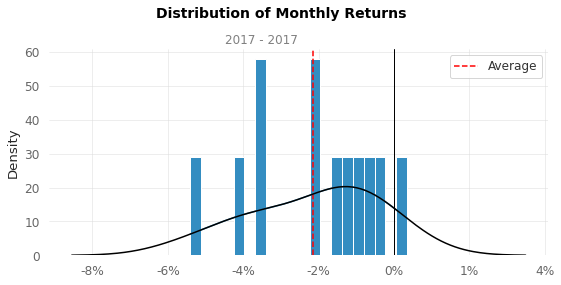

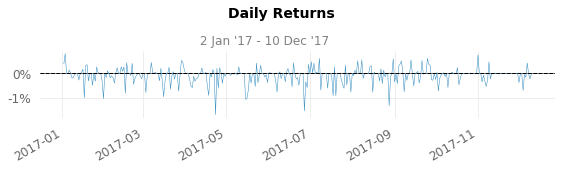

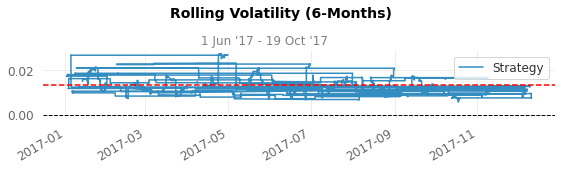

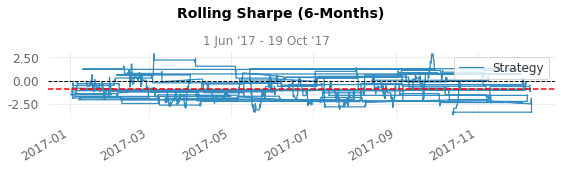

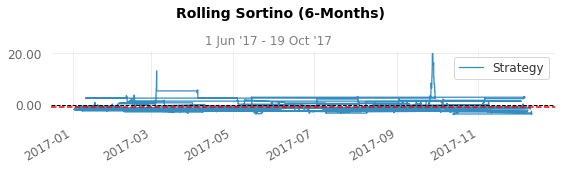

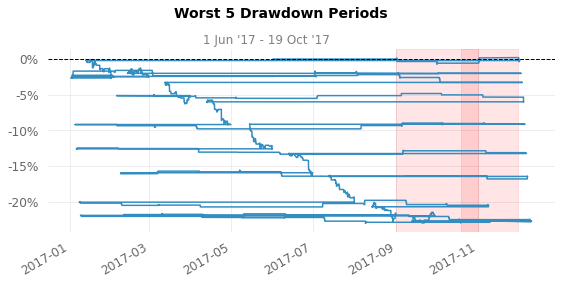

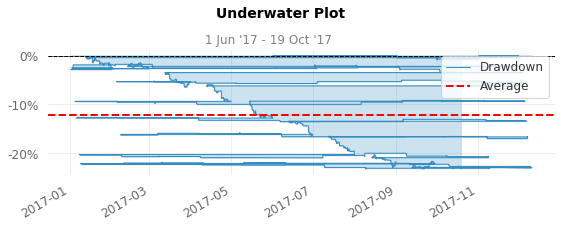

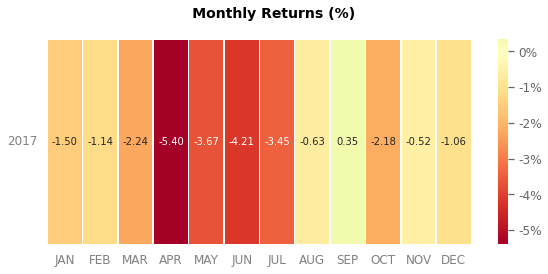

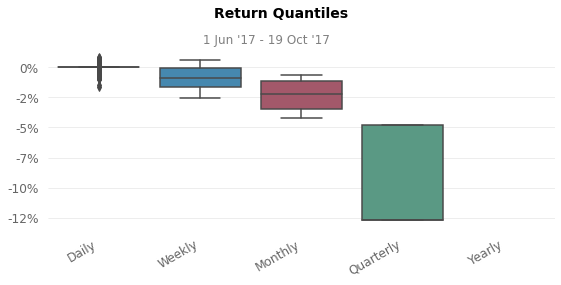

In [264]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[idx1+1:idx2])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

## Plot Results

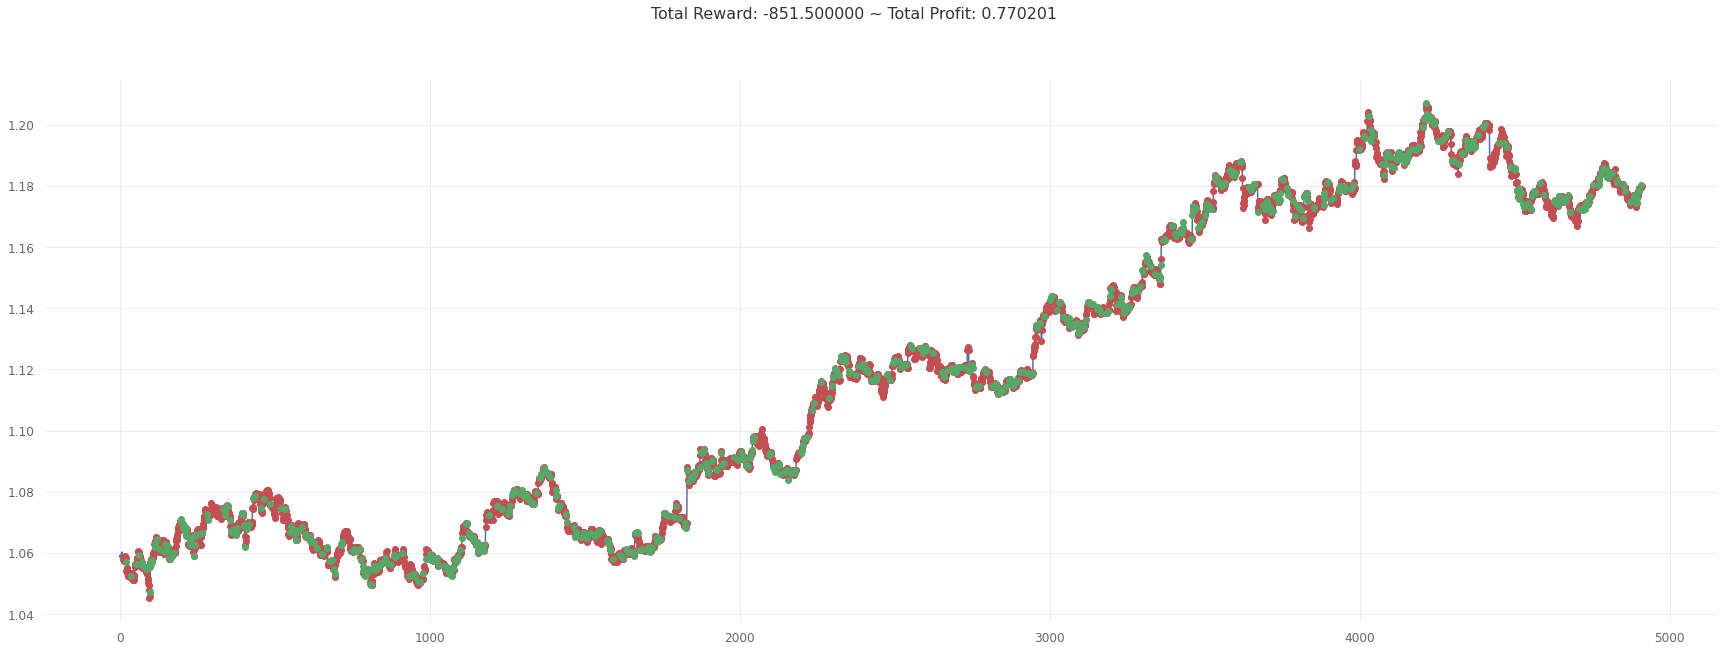

In [265]:
plt.figure(figsize=(30, 10))
env.render_all()
plt.show()

# tensorboard

In [266]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [268]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 3451), started 1:20:52 ago. (Use '!kill 3451' to kill it.)